In [1]:
import pandas as pd
from mplsoccer import Pitch
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("Data/Santa Clara/santaClaraShotsConceded.csv").reset_index()

In [5]:
data.dropna(inplace=True)
startX = []
startY = []
endX = []
endY = []
for i in range(data.shape[0]):
    row = data.iloc[i]
    startX.append(float(row.get("Start Pos").split(", ")[0][1:]))
    startY.append(float(row.get("Start Pos").split(", ")[1][:-1]))
    endX.append(float(row.get("End Pos").split(", ")[0][1:]))
    endY.append(float(row.get("End Pos").split(", ")[1][:-1]))
data = data.assign(startX = startX)
data =data.assign(startY = startY)
data =data.assign(endX = endX)
data =data.assign(endY = endY)
oppSide = dict()
for i in data.get("numOpportunity").unique():
    df = data[data.get("numOpportunity")==i]
    endX = df.iloc[-1].get("endX")
    if endX >60:
        side = "right"
    elif endX<=60:
        side = "left"
    oppSide[i]=side
data = data.assign(Side = data.get("numOpportunity").apply(lambda num:oppSide[num]))
rightOpportunities = data[data.get("Side") == "right"]
rightOpportunities = rightOpportunities.assign(startX = 120-rightOpportunities.get("startX"))
rightOpportunities = rightOpportunities.assign(startY = 80-rightOpportunities.get("startY"))
rightOpportunities = rightOpportunities.assign(endX = 120-rightOpportunities.get("endX"))
rightOpportunities = rightOpportunities.assign(endY = 80-rightOpportunities.get("endY"))
leftOpportunities = data[data.get("Side") == "left"]
opportunities = pd.merge(rightOpportunities, leftOpportunities,how = "outer")
opportunities.drop("Game",axis = 1,inplace = True)
opportunities.insert(1,"Game","Santa Clara")
opportunities.to_csv("Shots/SantaClaraOrigins.csv",index=False)

Text(0.5, 1.0, 'Heat Map of Opportunities Conceded With Buildup')

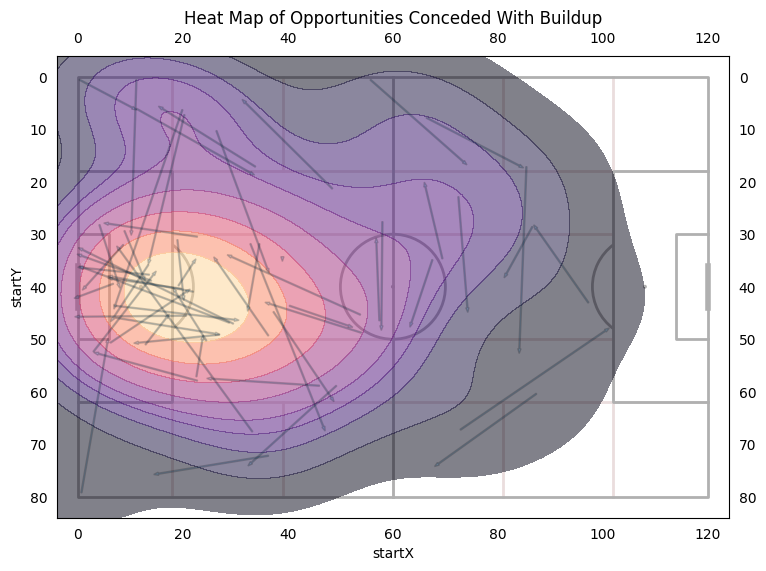

In [42]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=opportunities.get("startX"),y=opportunities.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")

for i in range(opportunities.shape[0]):
    row = opportunities.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .2)
plt.title("Heat Map of Opportunities Conceded With Buildup")

In [43]:
origins =[]
for i in range(int(opportunities.get("numOpportunity").max())+1):
    limited = opportunities[opportunities.get("numOpportunity") == i].iloc[0]
    origins.append(limited)
origins = pd.DataFrame(origins)

In [44]:
origins

,index,Game,numOpportunity,Event,Result,Start Pos,End Pos,Team,startX,startY,endX,endY,Side
0,1,Enter a game,0.0,Set Piece,Successful,"[49.23809523809522, 58.857142857142854]","[33.04761904761903, 73.52380952380952]",Opponent,49.238095,58.857143,33.047619,73.523810,left
5,11,Enter a game,1.0,Pass,Unsuccessful,"[52.47619047619046, 45.142857142857146]","[56.47619047619046, 33.142857142857146]",UCSD,67.523810,34.857143,63.523810,46.857143,right
9,19,Enter a game,2.0,Tackle,Successful,"[81.04761904761904, 45.714285714285715]","[81.04761904761904, 45.714285714285715]",Opponent,38.952381,34.285714,38.952381,34.285714,right
12,25,Enter a game,3.0,Set Piece,Successful,"[119.7142857142857, 79.42857142857143]","[109.61904761904762, 74.0952380952381]",Opponent,0.285714,0.571429,10.380952,5.904762,right
19,39,Enter a game,4.0,Throw-in,Successful,"[108.85714285714286, 79.42857142857143]","[109.8095238095238, 50.666666666666664]",Opponent,11.142857,0.571429,10.190476,29.333333,right
22,44,Enter a game,5.0,Set Piece,Unsuccessful,"[100.09523809523807, 73.71428571428572]","[112.85714285714286, 36.57142857142857]",Opponent,19.904762,6.285714,7.142857,43.428571,right
27,54,Enter a game,6.0,Throw-in,Successful,"[64.28571428571428, 79.42857142857143]","[46.57142857142856, 63.80952380952381]",Opponent,55.714286,0.571429,73.428571,16.190476,right
37,74,Enter a game,7.0,Set Piece,Unsuccessful,"[119.33333333333331, 0.7619047619047592]","[114.38095238095238, 29.33333333333333]",Opponent,0.666667,79.238095,5.619048,50.666667,right
40,80,Enter a game,8.0,Tackle,Successful,"[53.99999999999999, 68.95238095238095]","[-1, -1]",Opponent,66.000000,11.047619,121.000000,81.000000,right


Text(0.5, 1.0, 'Opponent Shots Origin')

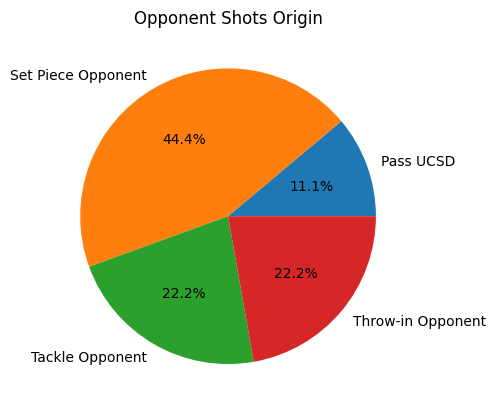

In [45]:
originCounts = origins.groupby(["Event","Team"]).count().reset_index()
labels = originCounts.get("Event") + " "+originCounts.get("Team")
plt.pie(originCounts.get("index"),labels = labels,autopct='%1.1f%%')
plt.title("Opponent Shots Origin")

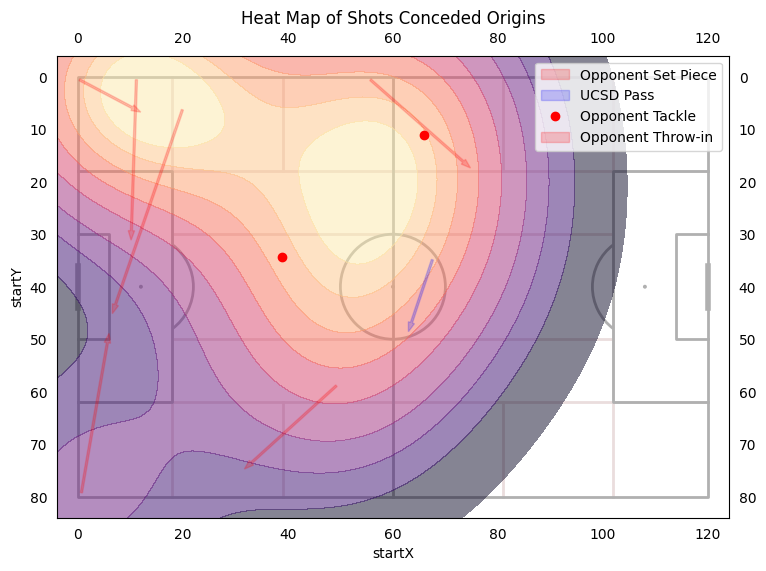

In [46]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=origins.get("startX"),y=origins.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")

for i in range(origins.shape[0]):
    row = origins.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle":
        if team == "UCSD":
            color = "ob"
        else:
            color = "ro"
        plt.plot(row.get("startX"),row.get("startY"),color,label = team+ " Tackle")
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .4,alpha = .2,color =color,label = team+ " "+row.get("Event"))
plt.title("Heat Map of Shots Conceded Origins")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())


Text(0.5, 1.0, 'Heat Map of Conceded Shots')

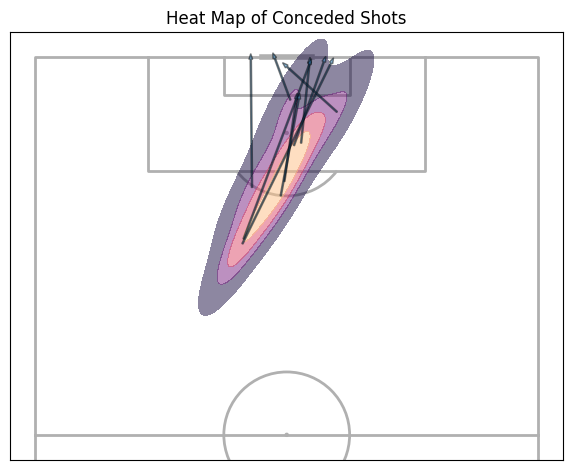

In [49]:
shots = opportunities[opportunities.get("Event").apply(lambda event: "Shot" in event)]
pitch = VerticalPitch(half=True, axis=True)
fig, ax = pitch.draw()
kde = sns.kdeplot(y=120-shots.get("startX"),x=80-shots.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 5,cmap = "magma")
for i in range(shots.shape[0]):
    row = shots.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(80-row.get("startY"),120-row.get("startX"),-1*(row.get("endY")-row.get("startY")),-1*(row.get("endX")-row.get("startX")),width = .2,alpha = .5)
plt.title("Heat Map of Conceded Shots")

In [50]:
#shot assists
shotAssists = []
for i in range(1, opportunities.shape[0]):
    previous = opportunities.iloc[i-1]
    row = opportunities.iloc[i]
    if "Shot" in row.get("Event"):
        shotAssists.append([previous.get("numOpportunity"),previous.get("Game"),previous.get("Team"),previous.get("Event"),previous.get("Result"),previous.get("startX"),previous.get("startY"),previous.get("endX"),previous.get("endY"),row.get("Result")])
shotAssists = pd.DataFrame(shotAssists,columns=["numOpportunity","Game","Team","Event","Event Result","startX","startY","endX",'endY',"Shot result"])

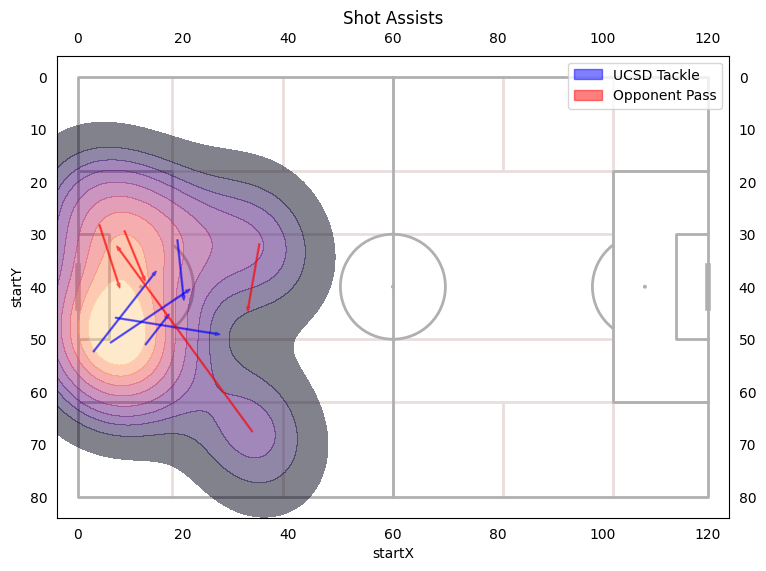

In [59]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=shotAssists.get("startX"),y=shotAssists.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")
for i in range(shotAssists.shape[0]):
    row = shotAssists.iloc[i]
    team = row.get("Team")
    if team == "Opponent":
        color = "Red"
    else:
        color = "Blue"
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .5,color = color, label = team+" "+row.get("Event"))
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
plt.title("Shot Assists")
plt.show()

Text(0.5, 1.0, 'Shot Assists')

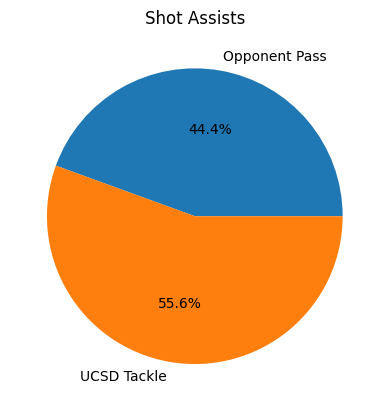

In [70]:
counts = shotAssists.groupby(["Event","Team"]).count()
plt.pie(counts.get("Game"),labels=["Opponent Pass","UCSD Tackle"],autopct='%1.1f%%')
plt.title("Shot Assists")